<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_2_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_2'

In [4]:
os.listdir(base_path)

['data_add_delta_2_n20.csv',
 'data_add_delta_2_n30.csv',
 'data_add_delta_2_n60.csv',
 'data_add_delta_2_n120.csv',
 'data_add_delta_2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.320560,69.522911,82.800960,12.547797,269.192228,1980.856308,-1711.664080
1,0.0,1.0,88.913049,54.771350,43.085764,-838.228187,-641.458023,1071.172024,-1712.630047
2,0.0,2.0,26.332714,60.854735,76.817732,-6728.311335,-6554.306155,-3704.298919,-2850.007235
3,0.0,3.0,54.604425,28.212191,54.382385,410.488257,557.687258,-1784.599839,2342.287097
4,0.0,4.0,71.304544,67.941155,58.573388,-3957.931138,-3750.112052,-150.195917,-3599.916135
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.779192,81.584043,46.620612,-3182.360141,-3007.376294,-1551.992687,-1455.383608
19996,999.0,16.0,22.635912,68.628895,78.314099,-7285.039951,-7105.461045,-3624.384729,-3481.076316
19997,999.0,17.0,53.202346,88.436047,59.887279,8725.761114,8937.286786,-2351.345820,11288.632606
19998,999.0,18.0,72.001311,32.727812,51.610136,1563.915210,1730.254469,1585.018921,145.235548


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.320560,69.522911,82.800960,12.547797,269.192228,1980.856308,-1711.664080
1,0.0,1.0,88.913049,54.771350,43.085764,-838.228187,-641.458023,1071.172024,-1712.630047
2,0.0,2.0,26.332714,60.854735,76.817732,-6728.311335,-6554.306155,-3704.298919,-2850.007235
3,0.0,3.0,54.604425,28.212191,54.382385,410.488257,557.687258,-1784.599839,2342.287097
4,0.0,4.0,71.304544,67.941155,58.573388,-3957.931138,-3750.112052,-150.195917,-3599.916135
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.779192,81.584043,46.620612,-3182.360141,-3007.376294,-1551.992687,-1455.383608
19996,999.0,16.0,22.635912,68.628895,78.314099,-7285.039951,-7105.461045,-3624.384729,-3481.076316
19997,999.0,17.0,53.202346,88.436047,59.887279,8725.761114,8937.286786,-2351.345820,11288.632606
19998,999.0,18.0,72.001311,32.727812,51.610136,1563.915210,1730.254469,1585.018921,145.235548


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    94.320560  69.522911  ...  1980.856308  -1711.664080
      1.0    88.913049  54.771350  ...  1071.172024  -1712.630047
      2.0    26.332714  60.854735  ... -3704.298919  -2850.007235
      3.0    54.604425  28.212191  ... -1784.599839   2342.287097
      4.0    71.304544  67.941155  ...  -150.195917  -3599.916135
...                ...        ...  ...          ...           ...
999.0 15.0   36.779192  81.584043  ... -1551.992687  -1455.383608
      16.0   22.635912  68.628895  ... -3624.384729  -3481.076316
      17.0   53.202346  88.436047  ... -2351.345820  11288.632606
      18.0   72.001311  32.727812  ...  1585.018921    145.235548
      19.0   60.872459  27.209294  ...  2529.848452  -1708.845458

[20000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    94.320560  69.522911  ...  1980.856308  -1711.664080
      1.0    88.913049  54.771350  ...  1071.172024  -1712.630047
      2.0    26.332714  60.854735  ... -3704.298919  -2850.007235
      3.0    54.604425  28.212191  ... -1784.599839   2342.287097
      4.0    71.304544  67.941155  ...  -150.195917  -3599.916135
...                ...        ...  ...          ...           ...
999.0 15.0   36.779192  81.584043  ... -1551.992687  -1455.383608
      16.0   22.635912  68.628895  ... -3624.384729  -3481.076316
      17.0   53.202346  88.436047  ... -2351.345820  11288.632606
      18.0   72.001311  32.727812  ...  1585.018921    145.235548
      19.0   60.872459  27.209294  ...  2529.848452  -1708.845458

[20000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,94.320560,69.522911,82.800960,12.547797,269.192228,1980.856308,-1711.664080
1,0.0,1.0,88.913049,54.771350,43.085764,-838.228187,-641.458023,1071.172024,-1712.630047
2,0.0,2.0,26.332714,60.854735,76.817732,-6728.311335,-6554.306155,-3704.298919,-2850.007235
3,0.0,3.0,54.604425,28.212191,54.382385,410.488257,557.687258,-1784.599839,2342.287097
4,0.0,4.0,71.304544,67.941155,58.573388,-3957.931138,-3750.112052,-150.195917,-3599.916135
...,...,...,...,...,...,...,...,...,...
19995,999.0,15.0,36.779192,81.584043,46.620612,-3182.360141,-3007.376294,-1551.992687,-1455.383608
19996,999.0,16.0,22.635912,68.628895,78.314099,-7285.039951,-7105.461045,-3624.384729,-3481.076316
19997,999.0,17.0,53.202346,88.436047,59.887279,8725.761114,8937.286786,-2351.345820,11288.632606
19998,999.0,18.0,72.001311,32.727812,51.610136,1563.915210,1730.254469,1585.018921,145.235548


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...        y_hat         e_hat
rep   index                        ...                           
0.0   0.0    94.320560  69.522911  ...  1980.856308  -1711.664080
      1.0    88.913049  54.771350  ...  1071.172024  -1712.630047
      2.0    26.332714  60.854735  ... -3704.298919  -2850.007235
      3.0    54.604425  28.212191  ... -1784.599839   2342.287097
      4.0    71.304544  67.941155  ...  -150.195917  -3599.916135
...                ...        ...  ...          ...           ...
999.0 15.0   36.779192  81.584043  ... -1551.992687  -1455.383608
      16.0   22.635912  68.628895  ... -3624.384729  -3481.076316
      17.0   53.202346  88.436047  ... -2351.345820  11288.632606
      18.0   72.001311  32.727812  ...  1585.018921    145.235548
      19.0   60.872459  27.209294  ...  2529.848452  -1708.845458

[20000 rows x 7 columns]

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]

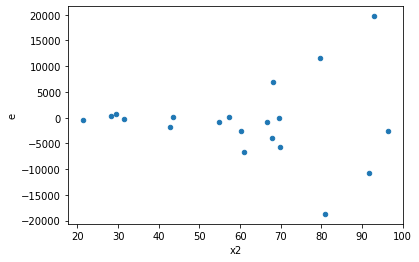

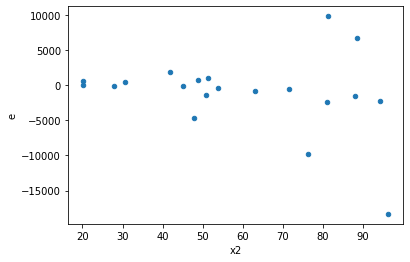

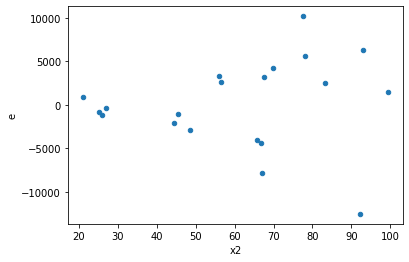

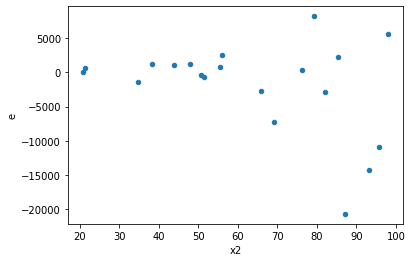

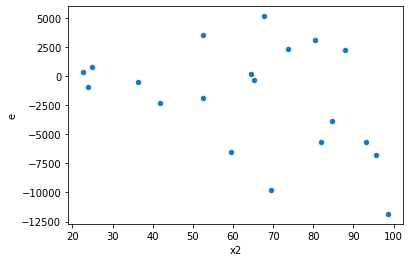

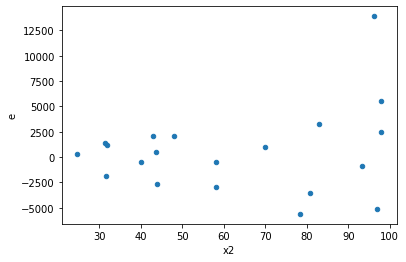

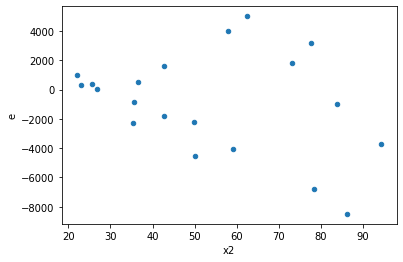

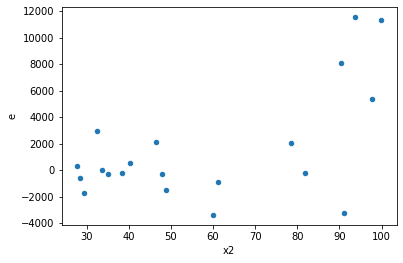

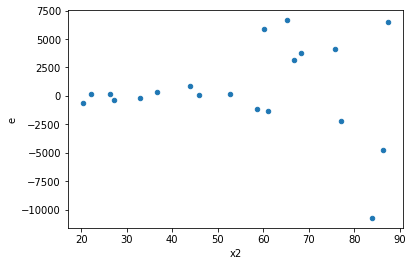

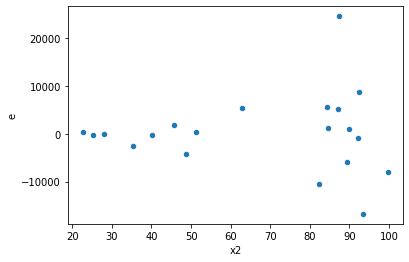

In [13]:
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [14]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,5.0,5.0,1010850274.2588726,4186222.5192596526,252712568.56471816,1046555.6298149131,241.47074590713464,1.1815679270776869e-05,0.9999940921603646,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,186014261.26938137,17631207.03329767,46503565.31734534,4407801.758324417,10.550285123309,0.021778312203282413,0.9891108438983588,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,219609988.39143008,20347307.12488277,54902497.09785752,5086826.781220692,10.793073847244804,0.020716633220738245,0.9896416833896309,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,562275777.2136366,3830526.8599004745,140568944.30340916,957631.7149751186,146.78810455547773,4.062321654174639e-05,0.9999796883917291,Reject005=0 : Heteroscedasticity
5.0,5.0,5.0,212340542.1091003,5504454.518654138,53085135.52727508,1376113.6296635345,38.57612800496323,0.0010729650748415587,0.9994635174625792,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,52276832.217030846,9035232.178581038,13069208.054257711,2258808.0446452596,5.785886979302926,0.07669317167193901,0.9616534141640305,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,137560513.0468431,4082745.315535745,34390128.26171078,1020686.3288839363,33.69314086857073,0.0014855041061807572,0.9992572479469096,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,173931682.6726873,565345.0958010451,43482920.66817182,141336.27395026127,307.655773375448,6.468947002069569e-06,0.999996765526499,Reject005=0 : Heteroscedasticity
9.0,5.0,5.0,350717008.30124736,8336108.522532449,87679252.07531184,2084027.1306331123,42.07203005494248,0.0008702635930208924,0.9995648682034896,Reject005=0 : Heteroscedasticity


In [16]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,5.0,1010850274.2588726,4186222.5192596526,252712568.56471816,1046555.6298149131,241.47074590713464,1.1815679270776869e-05,Reject005=0 : Heteroscedasticity
1.0,5.0,5.0,186014261.26938137,17631207.03329767,46503565.31734534,4407801.758324417,10.550285123309,0.021778312203282413,Reject005=0 : Heteroscedasticity
2.0,5.0,5.0,219609988.39143008,20347307.12488277,54902497.09785752,5086826.781220692,10.793073847244804,0.020716633220738245,Reject005=0 : Heteroscedasticity
3.0,5.0,5.0,562275777.2136366,3830526.8599004745,140568944.30340916,957631.7149751186,146.78810455547773,4.062321654174639e-05,Reject005=0 : Heteroscedasticity
4.0,5.0,5.0,18143213.634670593,46157855.62167921,4535803.408667648,11539463.905419802,0.39306881548780553,0.3285185125536463,Reject005=1 : Homoscedasticity
5.0,5.0,5.0,212340542.1091003,5504454.518654138,53085135.52727508,1376113.6296635345,38.57612800496323,0.0010729650748415587,Reject005=0 : Heteroscedasticity
6.0,5.0,5.0,52276832.217030846,9035232.178581038,13069208.054257711,2258808.0446452596,5.785886979302926,0.07669317167193901,Reject005=1 : Homoscedasticity
7.0,5.0,5.0,137560513.0468431,4082745.315535745,34390128.26171078,1020686.3288839363,33.69314086857073,0.0014855041061807572,Reject005=0 : Heteroscedasticity
8.0,5.0,5.0,173931682.6726873,565345.0958010451,43482920.66817182,141336.27395026127,307.655773375448,6.468947002069569e-06,Reject005=0 : Heteroscedasticity


In [17]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    788
Reject005=1 : Homoscedasticity      212
Name: Result_test, dtype: int64